In [33]:
from __future__ import division
import tarfile
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import random
# Display plots inline 
%matplotlib inline

In [34]:
def gentxt(filepath,delimiter):
    return np.genfromtxt(filepath,delimiter=delimiter,dtype=None)
def extract():
    print ("Training Data Loading")
    
    trainX=gentxt("data/trainX.csv",delimiter='\t')
    trainY=gentxt("data/trainY.csv",delimiter='\t')
    print("Testing Data Loading")
    testX=gentxt("data/testX.csv",delimiter='\t')
    testY=gentxt("data/testY.csv",delimiter='\t')
    return trainX,trainY,testX,testY
trainX,trainY,testX,testY=extract()


Training Data Loading
Testing Data Loading


In [35]:
#Shape for X and Y
#X has 953 rows and 2955 features
#Y has 2 labels whether it is a spam or not
print(trainX.shape)
print(trainY.shape)

(953, 2955)
(953, 2)


# TRYING OUT DIFFERENT ITERATIONS TO FIND THE BEST ONE 

In [36]:
#find out for different iterations to find out the optimal iterations
iter1=10000
iter2=15000
iter3=26000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)


In [37]:
#Define the placeholder variables
numfeatures=trainX.shape[1]
numlabels=trainY.shape[1]
X=tf.placeholder(tf.float32,shape=[None,numfeatures])
Y=tf.placeholder(tf.float32,shape=[None,numlabels])
#Define the weights and biases
#Define weights and biases as variables since it changes over the iterations
w=tf.Variable(tf.random_normal([numfeatures,numlabels],mean=0,
                                       stddev=(np.sqrt(6/numfeatures+
                                                         numlabels+1))))
b=tf.Variable(tf.random_normal([1,numlabels],mean=0,
                                       stddev=(np.sqrt(6/numfeatures+
                                                         numlabels+1))))


In [38]:
#Find out the predicted Y value
init=tf.initialize_all_variables()
Y_predicted=tf.nn.sigmoid(tf.add(tf.matmul(X,w),b))


In [39]:
#Define the loss function and optimizer
#We use a mean squared loss function
#There is a function in tensorflow tf.nn.l2_loss which finds the mean squared loss without square root
loss=tf.nn.l2_loss(Y_predicted-Y)
optimizer=tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

In [40]:
#Define the session to compute the graph
errors=[]
with tf.Session() as sess:
    sess.run(init)
    prediction=tf.equal(tf.argmax(Y,1),tf.argmax(Y_predicted,1))
    accuracy=tf.reduce_mean(tf.cast(prediction,"float"))
    for i in range (iter1):
        sess.run(optimizer,feed_dict={X:trainX,Y:trainY})
        accuracy_value=accuracy.eval(feed_dict={X:trainX,Y:trainY})
        errors.append(1-accuracy_value)
    print("The error has been reduced to",errors[-1])
    print(sess.run(accuracy,feed_dict={X:trainX,Y:trainY}))
    
    
    

The error has been reduced to 0.0944386124611
0.905561


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


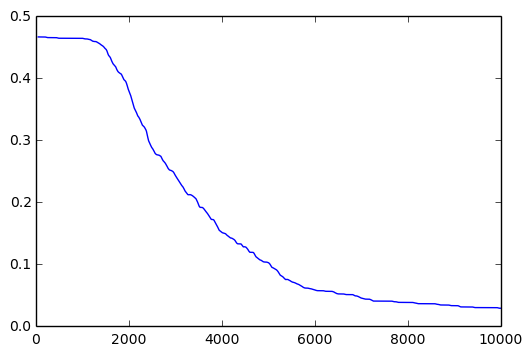

In [32]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [72]:
errors=[]
with tf.Session() as sess:
    sess.run(init)
    prediction=tf.equal(tf.argmax(Y,1),tf.argmax(Y_predicted,1))
    accuracy=tf.reduce_mean(tf.cast(prediction,"float"))
    for i in range (iter2):
        sess.run(optimizer,feed_dict={X:trainX,Y:trainY})
        accuracy_value=sess.run(accuracy,feed_dict={X:trainX,Y:trainY})
        errors.append(1-accuracy_value)
    print("The error has been reduced to",errors[-1])
    print(sess.run(accuracy,feed_dict={X:trainX,Y:trainY}))
    


The error has been reduced to 0.0545645356178
0.945435


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


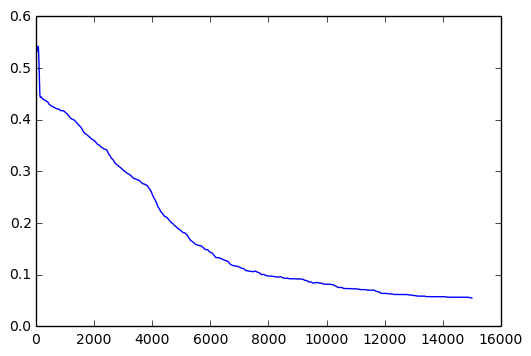

In [73]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

# FOUND THAT ACCURACY IS BETTER WITH ~26K ITERATIONS


The error has been reduced to 0.0482686161995
0.951731


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


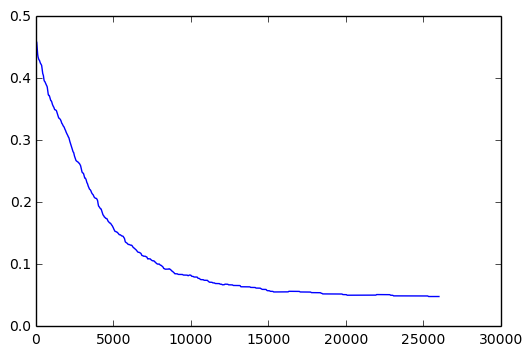

In [16]:
errors=[]
with tf.Session() as sess:
    sess.run(init)
    prediction=tf.equal(tf.argmax(Y,1),tf.argmax(Y_predicted,1))
    accuracy=tf.reduce_mean(tf.cast(prediction,"float"))
    for i in range (iter3):
        sess.run(optimizer,feed_dict={X:trainX,Y:trainY})
        accuracy_value=sess.run(accuracy,feed_dict={X:trainX,Y:trainY})
        errors.append(1-accuracy_value)
    print("The error has been reduced to",errors[-1])
    print(sess.run(accuracy,feed_dict={X:trainX,Y:trainY}))
    
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

In [ ]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()

# PART B: 
# WE ADD A HIDDEN LAYER WITH 4 NODES .


In [22]:
iter4=26000
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [26]:
init=tf.initialize_all_variables()
h1=tf.nn.sigmoid(tf.add(tf.matmul(X,w1),b1))
Y_predicted = tf.nn.sigmoid(tf.add(tf.matmul(h1, w2), b2))

#Define the loss function and optimizer
#We use a mean squared loss function
#There is a function in tensorflow tf.nn.l2_loss which finds the mean squared loss without square root
loss=tf.nn.l2_loss(Y_predicted-Y)
optimizer=tf.train.GradientDescentOptimizer(learningRate).minimize(loss)

In [29]:
errors=[]
with tf.Session() as sess:
    sess.run(init)
    prediction=tf.equal(tf.argmax(Y,1),tf.argmax(Y_predicted,1))
    accuracy=tf.reduce_mean(tf.cast(prediction,"float"))
    for i in range (iter4):
        sess.run(optimizer,feed_dict={X:trainX,Y:trainY})
        accuracy_value=accuracy.eval(feed_dict={X:trainX,Y:trainY})
        errors.append(1-accuracy_value)
    print("The error has been reduced to",errors[-1])
    print(sess.run(accuracy,feed_dict={X:trainX,Y:trainY}))
    `


The error has been reduced to 0.00839453935623
0.991605


# WHEN WE ADD A HIDDEN LAYER WITH SAME NUMBER OF ITERATIONS,ACCURACY INCREASES TO 99%

/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


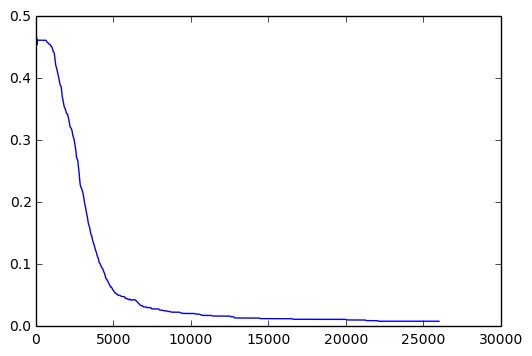

In [30]:
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()